In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

NameError: name 'fetch_openml' is not defined

In [5]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data, mnist.target, train_size=0.7)

In [10]:
from sklearn.neural_network import MLPClassifier

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(50))

In [13]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
ypredtest=clf.predict(xtest)

In [25]:
ytest[0]

'9'

In [26]:
from sklearn.metrics import precision_score

In [54]:
from sklearn.metrics import zero_one_loss

In [56]:
import time

In [30]:
precision_score(ytest,ypredtest,average='micro')

0.9463809523809524

In [55]:
l=[2,10,20,50,100]
for k in range(0, 5):
    x=[]
    for i in range(0, l[k]):
        x.append(50)
    print(l[k], " couches :")
    clf = MLPClassifier(hidden_layer_sizes=(x))
    clf.fit(xtrain, ytrain)
    ypredtest=clf.predict(xtest)
    precision = precision_score(ytest,ypredtest,average='micro')
    print("precision : ", precision)
    erreur = zero_one_loss(ytest,ypredtest)
    print("erreur : ", erreur)

    

2  couches :
precision :  0.9584285714285714
erreur :  0.04157142857142859
10  couches :
precision :  0.9646666666666667
erreur :  0.03533333333333333
20  couches :
precision :  0.9670952380952381
erreur :  0.03290476190476188
50  couches :
precision :  0.8612857142857143
erreur :  0.13871428571428568
100  couches :
precision :  0.11452380952380953
erreur :  0.8854761904761905


In [43]:
x=[]
t=60
for i in range(1, 21):
    t=t-2
    x.append(t)
    
print("Pour 20 couches avec un pas de -2 neuronnes par couche :")
clf = MLPClassifier(hidden_layer_sizes=(x))
clf.fit(xtrain, ytrain)
ypredtest=clf.predict(xtest)
precision = precision_score(ytest,ypredtest,average='micro')
print(precision)


x=[]
t=60
for i in range(1, 51):
    t=t-1
    x.append(t)
    
print("Pour 50 couches avec un pas de -1 neuronne par couche :")
clf = MLPClassifier(hidden_layer_sizes=(x))
clf.fit(xtrain, ytrain)
ypredtest=clf.predict(xtest)
precision = precision_score(ytest,ypredtest,average='micro')
print(precision)

Pour 20 couches avec un pas de -2 neuronnes par couche :
0.9662857142857143
Pour 50 couches avec un pas de -1 neuronne par couche :
0.11452380952380953


In [46]:
l=["lbfgs","sgd","adam"]
x=[]
for i in range(1, 21):
        x.append(50)
        
for k in range(1,4):
    print("pour le solver", l[k-1])
    clf = MLPClassifier(hidden_layer_sizes=(x),solver=(l[k-1]))
    clf.fit(xtrain, ytrain)
    ypredtest=clf.predict(xtest)
    precision = precision_score(ytest,ypredtest,average='micro')
    print(precision)

pour le solver lbfgs
0.6995238095238095
pour le solver sgd
0.954047619047619
pour le solver adam
0.9700952380952381


In [49]:
l=["identity","logistic","tanh","relu"]
x=[]
for i in range(1, 21):
        x.append(50)
        
for k in range(1,5):
    print("pour la fonction d'activation", l[k-1])
    clf = MLPClassifier(hidden_layer_sizes=(x),activation=(l[k-1]))
    clf.fit(xtrain, ytrain)
    ypredtest=clf.predict(xtest)
    precision = precision_score(ytest,ypredtest,average='micro')
    print(precision)

pour la fonction dactivation identity
0.8998571428571429
pour la fonction dactivation logistic
0.11452380952380953
pour la fonction dactivation tanh
0.9363333333333334
pour la fonction dactivation relu
0.9673333333333334


In [58]:
list_prec=[]
list_err=[]
list_time=[]



l=[0.0001,0.001,0.01,0.1]
x=[]
for i in range(1, 21):
        x.append(50)
        
for k in range(1,5):
    print("pour alpha =", l[k-1])
    clf = MLPClassifier(hidden_layer_sizes=(x),alpha=(l[k-1]))
    clf.fit(xtrain, ytrain)
    time1=time.time()
    ypredtest=clf.predict(xtest)
    time2=time.time()
    precision = precision_score(ytest,ypredtest,average='micro')
    print("precision :", precision)
    erreur = zero_one_loss(ytest,ypredtest)
    print("erreur :", erreur)
    print("temps d'apprentisage", (time2-time1))
    list_prec.append(precision)
    list_err.append(erreur)
    list_time.append(time2-time1)

pour alpha = 0.0001
0.9689523809523809
erreur :  0.0310476190476191
pour alpha = 0.001
0.9697142857142858
erreur :  0.03028571428571425
pour alpha = 0.01
0.971
erreur :  0.029000000000000026
pour alpha = 0.1
0.9708095238095238
erreur :  0.02919047619047621


In [60]:
import matplotlib.pyplot as plt

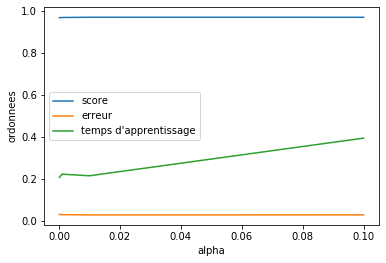

In [64]:
plt.plot(l, list_prec, label="score")
plt.plot(l, list_err, label="erreur")
plt.plot(l, list_time, label="temps d'apprentissage")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("ordonnees")
plt.show()